# Week10 Regression

Regression models are used to predict a continuous value. Predicting prices of a house given the features of house like size, price etc is one of the common examples of Regression. It is a supervised technique.

In week10, we've covered various types of Regression:
* **Simple Linear Regression**
* **Polynomial Regression**
* **Decision Tree Regression**
* **Random Forest Regression**

The best way to consolidate the knowledge in your mind is by practicing.<br>Please complete the part marked with <span style="color:green">**# TODO**</span>.

[Google](www.google.com), [Python Documentation](https://docs.python.org/3/contents.html), and [scikit-learn Documentation](https://scikit-learn.org/stable/) are your good friends if you have any python questions.

Download **Week10_regression.ipynb** notebook to your local folder and open it with Jupyter Notebook.

### Initializing Packages and Importing Data

Install Python SciPy libraries (ex. `numpy`, `pandas`, `matplotlib`, `seaborn`)
    

In [240]:
# TODO
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Load Data

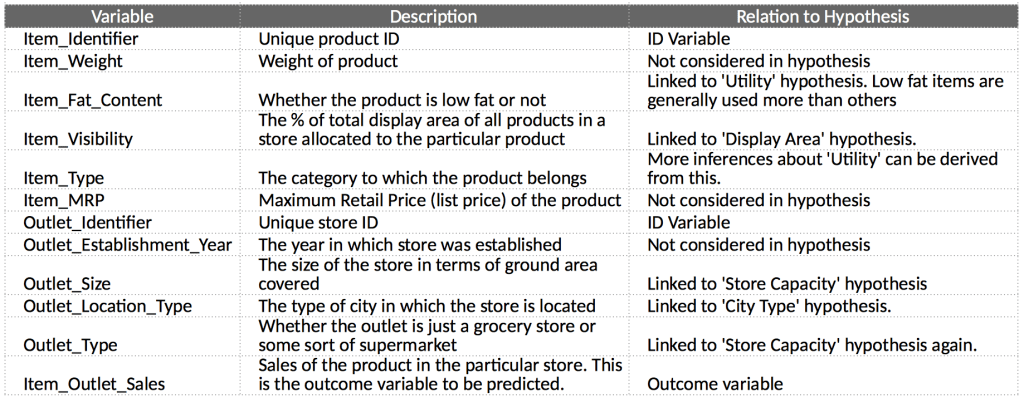

In [241]:
# TODO
df = pd.read_csv('bigmart_data.csv')
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Exploratory Data Analysis (EDA)
1. Univariate Distribution (Numerical and Categorical Variables)
2. Bivariate Distribution
3. Correlation Analysis

In [242]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [243]:
str(df['Item_Weight'].dtypes)

'float64'

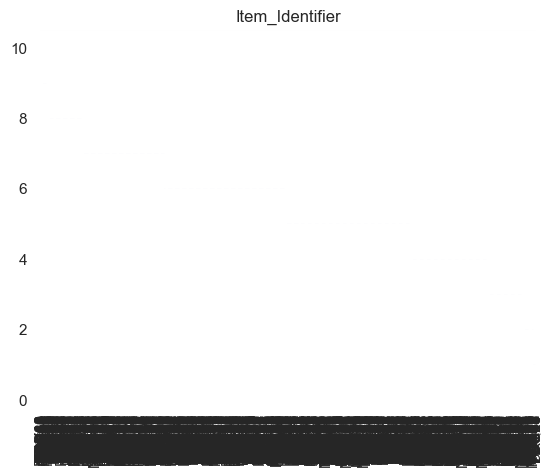

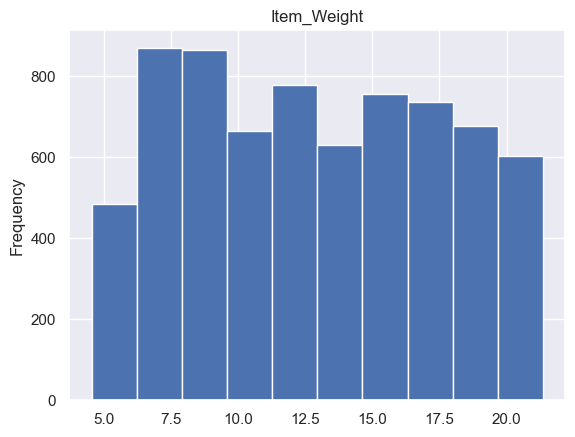

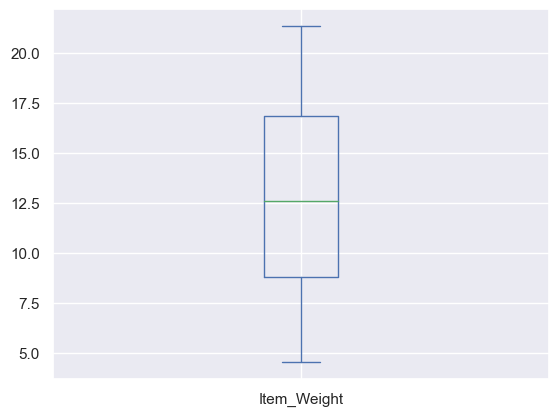

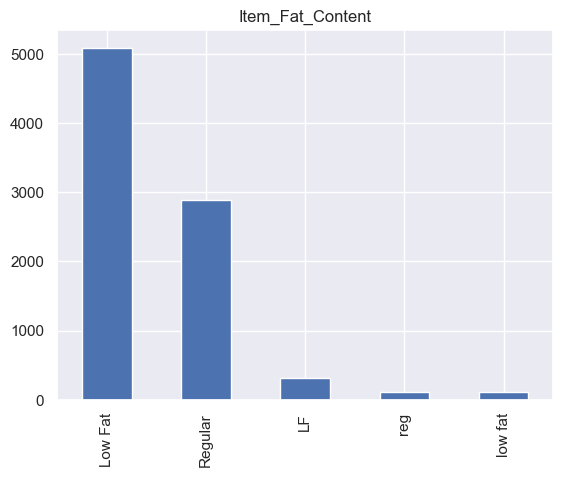

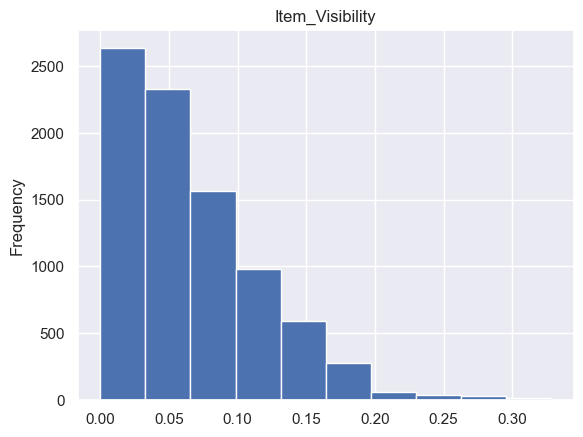

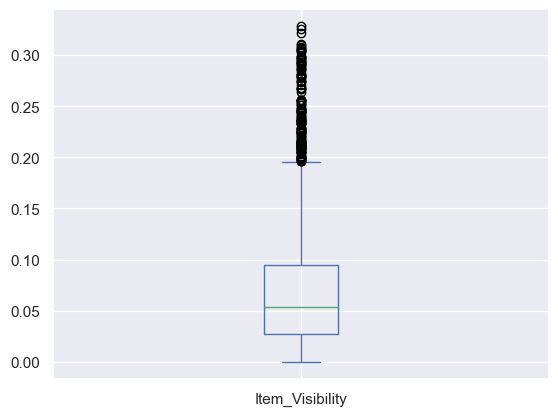

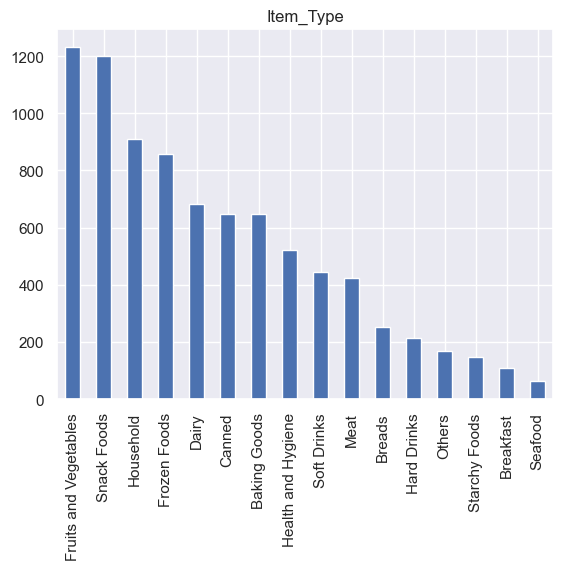

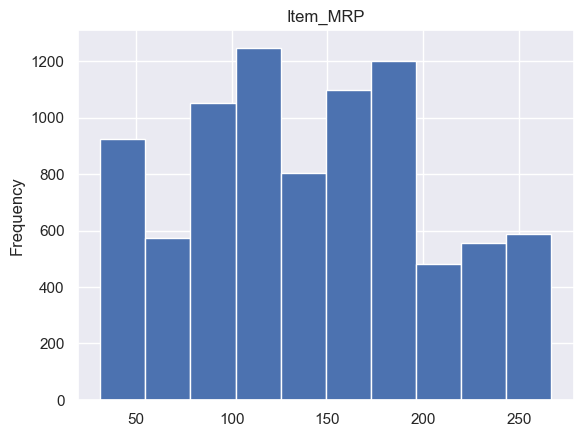

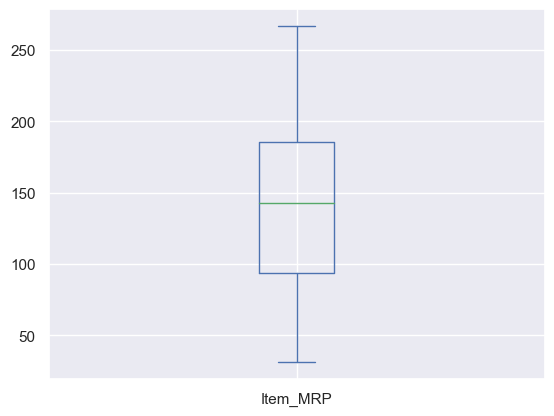

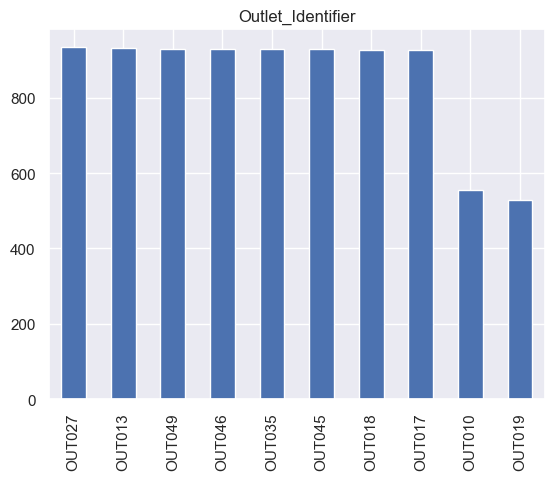

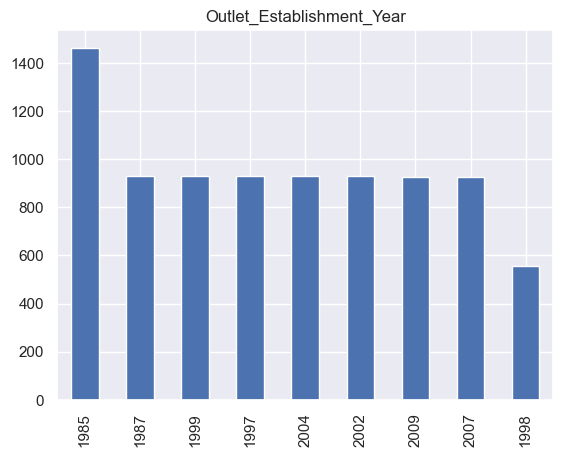

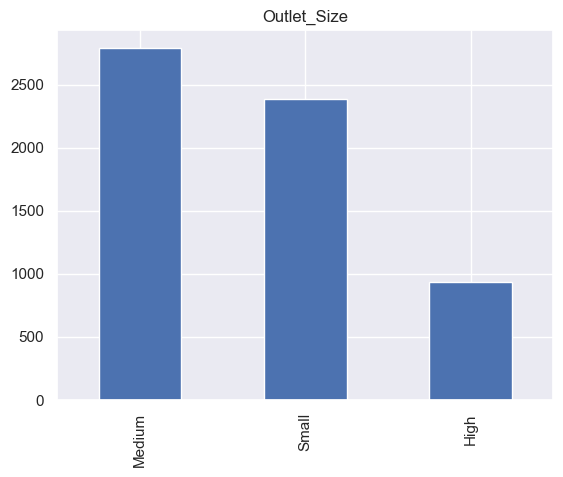

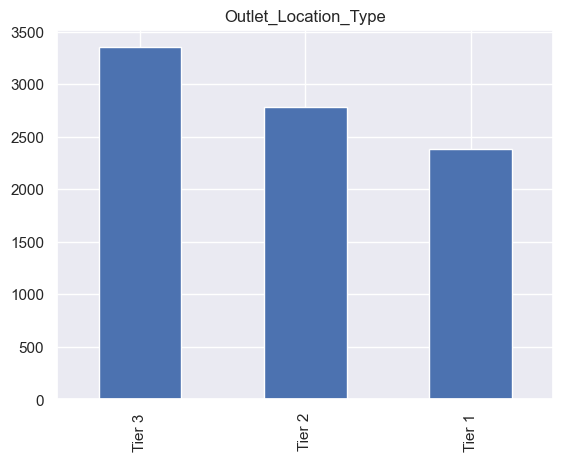

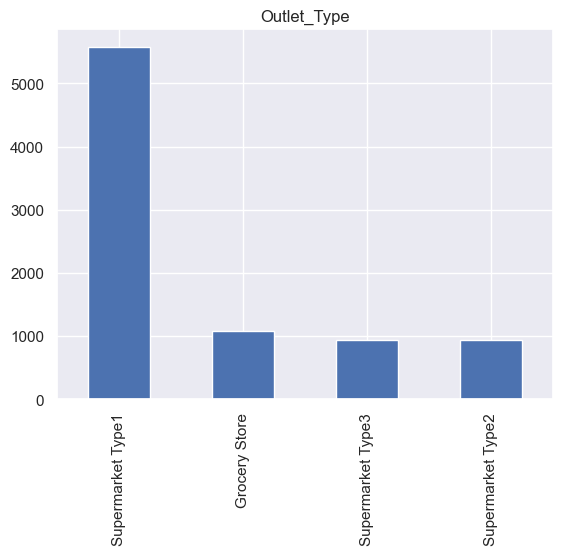

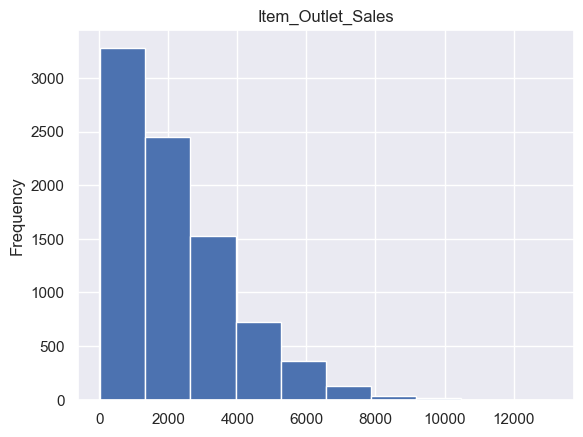

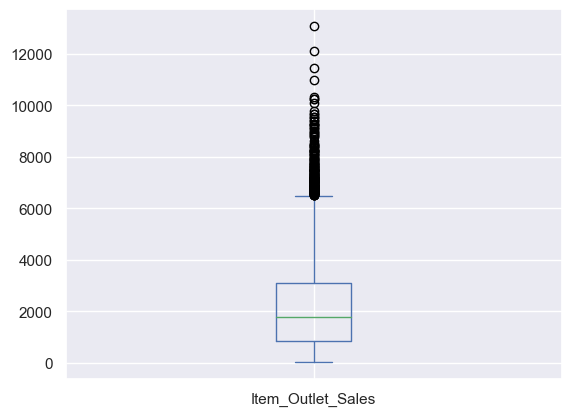

In [244]:
for col in df.columns:
    plt.title(col)
    if str(df[col].dtypes) =='float64':
        # Histogram
        df[col].plot(kind='hist')
        plt.show()
        # Boxplot
        df[col].plot(kind='box')
        plt.show()
    else:
        counts = df[col].value_counts()
        counts.plot(kind='bar')
        plt.show()

In [245]:
# 2. Bivariate Distribution

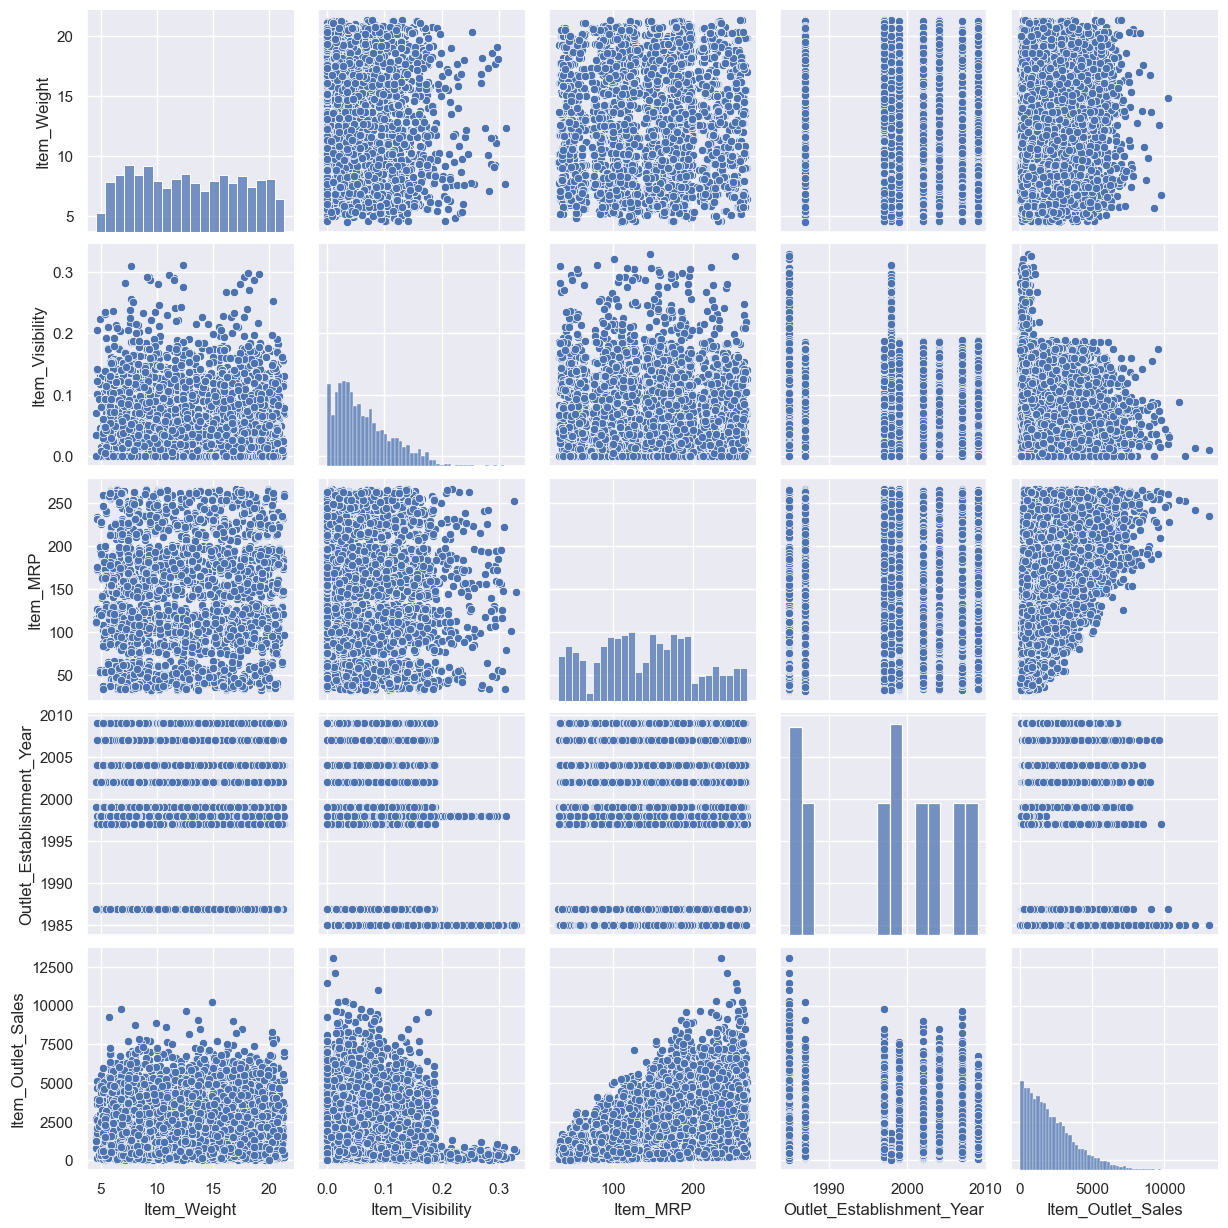

In [246]:
sns.pairplot(df)
plt.show()

<AxesSubplot:>

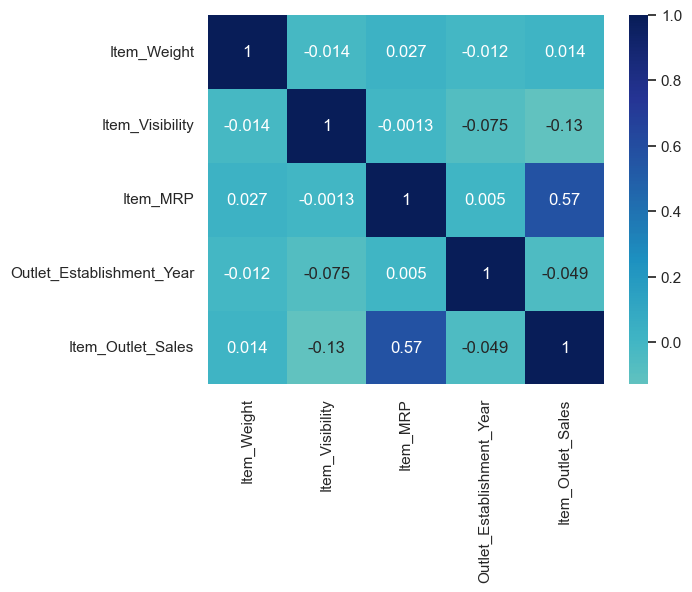

In [247]:
# 3. Correlation Analysis
sns.heatmap(df.corr(), center=0, annot=True, cmap="YlGnBu")

In [248]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


### Data Preprocessing

Look for missing values

Impute missing values

In [249]:
# TODO
df = df.dropna().reset_index(drop=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
4,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


Feature engineering -- examine each column, perform necessary steps to prepare your data before modeling

Encode categorical variables (dummy variables)

In [250]:
import category_encoders as ce
size_encoder= ce.OrdinalEncoder(cols=['Outlet_Size'],return_df=True,
                           mapping=[{'col':'Outlet_Size', 'mapping':{'Small':1,'Medium':2,'High':3}}])
df['Outlet_Size_transformed'] = size_encoder.fit_transform(df[['Outlet_Size']])

In [251]:
fat_encoder= ce.OrdinalEncoder(cols=['Item_Fat_Content'],return_df=True,
                           mapping=[{'col':'Item_Fat_Content', 'mapping':{'Low Fat':1,'LF':1,'low fat':1, 'reg':2, 'Regular':2}}])
df['Item_Fat_Content_transformed'] = fat_encoder.fit_transform(df[['Item_Fat_Content']])

In [252]:
type_encoder= ce.OrdinalEncoder(cols=['Outlet_Location_Type'],return_df=True,
                           mapping=[{'col':'Outlet_Location_Type', 'mapping':{'Tier 1':1,'Tier 2':2,'Tier 3':3}}])
df['Outlet_Location_Type_transformed'] = type_encoder.fit_transform(df[['Outlet_Location_Type']])


In [253]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_transformed,Item_Fat_Content_transformed,Outlet_Location_Type_transformed
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,2,1,1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2,2,3
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,2,1,1
3,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,3,1,3
4,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,2,2,3


In [254]:
item_type_encoder =ce.OneHotEncoder(cols='Item_Type',handle_unknown='return_nan',return_df=True,use_cat_names=True)
item_type_encoder.fit_transform(df[['Item_Type']])

,Item_Type_Dairy,Item_Type_Soft Drinks,Item_Type_Meat,Item_Type_Household,Item_Type_Baking Goods,Item_Type_Snack Foods,Item_Type_Fruits and Vegetables,Item_Type_Breakfast,Item_Type_Health and Hygiene,Item_Type_Frozen Foods,Item_Type_Hard Drinks,Item_Type_Canned,Item_Type_Starchy Foods,Item_Type_Breads,Item_Type_Others,Item_Type_Seafood
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4646,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4648,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

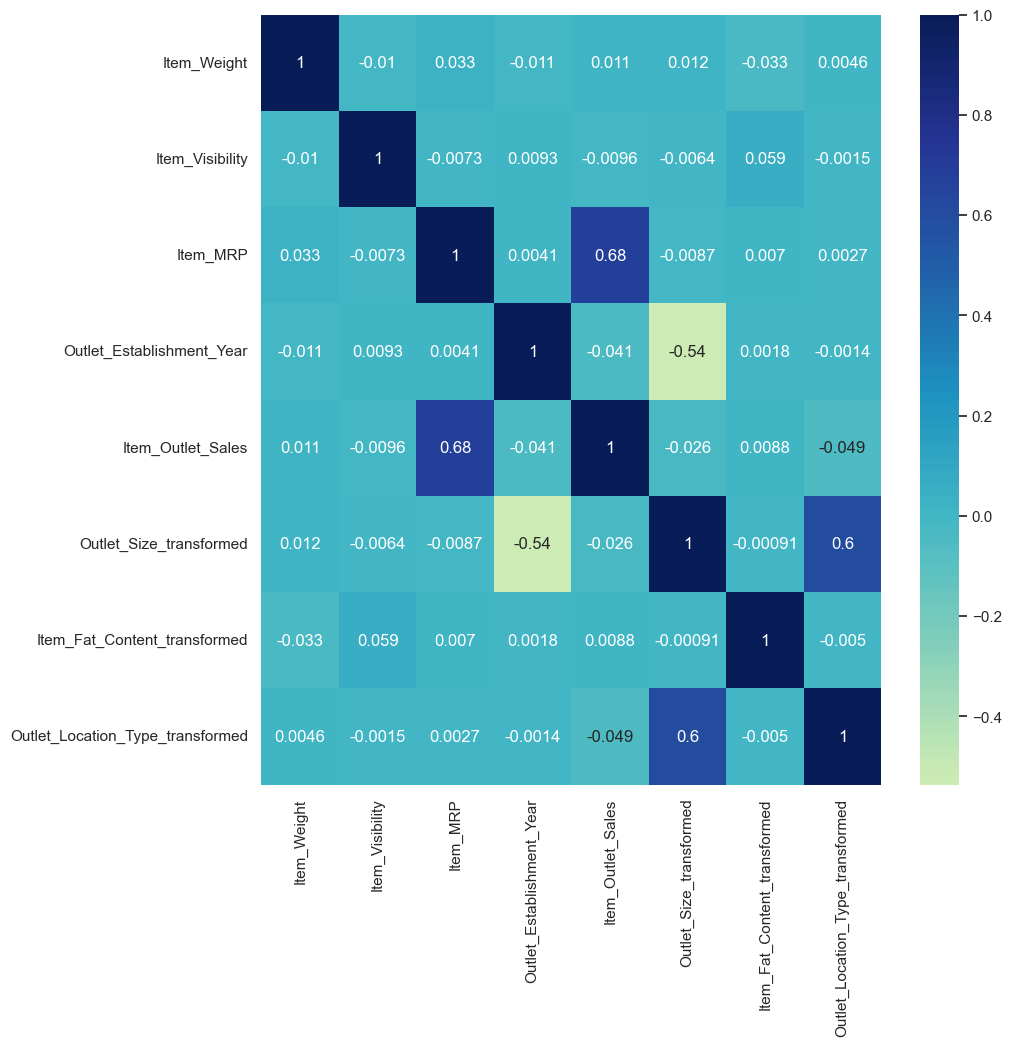

In [255]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), center=0, annot=True, cmap="YlGnBu")

In [256]:
result = pd.concat([df, item_type_encoder.fit_transform(df[['Item_Type']])], axis=1)
result

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Breakfast,Item_Type_Health and Hygiene,Item_Type_Frozen Foods,Item_Type_Hard Drinks,Item_Type_Canned,Item_Type_Starchy Foods,Item_Type_Breads,Item_Type_Others,Item_Type_Seafood
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4645,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4646,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4647,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4648,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [257]:
result.corr()['Item_Outlet_Sales'].sort_values()
# There is no meaningful correlation added with this Item_Type one hot encoder so we are not going to keep using this

Outlet_Location_Type_transformed   -0.049423
Item_Type_Baking Goods             -0.042969
Outlet_Establishment_Year          -0.040869
Item_Type_Soft Drinks              -0.034606
Outlet_Size_transformed            -0.025965
Item_Type_Health and Hygiene       -0.022511
Item_Type_Canned                   -0.012944
Item_Type_Frozen Foods             -0.011292
Item_Visibility                    -0.009644
Item_Type_Others                   -0.007343
Item_Type_Breakfast                -0.005168
Item_Type_Hard Drinks              -0.004158
Item_Type_Meat                     -0.003272
Item_Fat_Content_transformed        0.008847
Item_Weight                         0.010972
Item_Type_Fruits and Vegetables     0.011140
Item_Type_Dairy                     0.013022
Item_Type_Breads                    0.013428
Item_Type_Starchy Foods             0.019520
Item_Type_Household                 0.026479
Item_Type_Seafood                   0.028798
Item_Type_Snack Foods               0.032228
Item_MRP  

### Modeling

Split to training set and testing set (Note: test_size = 0.25, random_state = 42)

In [394]:
# TODO
from sklearn.decomposition import PCA
target = "Item_Outlet_Sales"

features_ignore = [target, 'Item_Identifier','Outlet_Identifier' ]
features = [c for c in df.columns if c not in features_ignore]
print(len(features))
print(len(df.columns))

categorical_features = []
numerical_features = []

for c in df.columns:
    if str(df[c].dtypes) =='object':
        categorical_features.append(c)
    else:
        if c != target:
            numerical_features.append(c)

pca = PCA(n_components=1)
pca.fit(df[numerical_features])

pca_values = pca.transform(df[numerical_features])
            
            
features = ["Item_MRP"]
# But based on the correlation the only meaningful feature with correlation to the target variable is Item_MRP

12
15


In [316]:
# TODO
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=0.25, random_state=42)



#Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df[numerical_features])
train_scaled = pd.DataFrame(scaler.transform(train[numerical_features]), columns=numerical_features)
test_scaled = pd.DataFrame(scaler.transform(test[numerical_features]), columns=numerical_features)

train_scaled['Item_Outlet_Sales'] = [ i for i in train["Item_Outlet_Sales"]]
test_scaled['Item_Outlet_Sales'] = [i for i in test["Item_Outlet_Sales"]]
test_scaled

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size_transformed,Item_Fat_Content_transformed,Outlet_Location_Type_transformed,Item_Outlet_Sales
0,-0.993192,-0.588379,-0.453953,-0.025790,0.266543,-0.740227,-1.118034,2073.3012
1,1.520473,0.976301,-0.582469,-0.025790,0.266543,1.350937,-1.118034,1270.3464
2,-0.643120,-0.717540,-0.395219,-1.650045,1.602132,1.350937,1.118034,810.9444
3,-1.024238,-0.639922,0.211185,-0.296499,-1.069045,1.350937,-1.118034,1713.7692
4,-0.429009,0.087921,0.880623,-1.650045,1.602132,-0.740227,1.118034,1170.4764
...,...,...,...,...,...,...,...,...
1158,-0.620639,0.636250,0.086421,-1.650045,1.602132,-0.740227,1.118034,2916.2040
1159,1.381301,-0.879104,-0.314138,-0.025790,0.266543,1.350937,-1.118034,2892.2352
1160,-1.470660,-0.852009,0.555750,0.650983,-1.069045,-0.740227,0.000000,4250.4672
1161,-0.792998,1.277238,0.285858,-0.025790,0.266543,1.350937,-1.118034,1283.6624


Define target and predictors (Drop `Item_Identifier` and `Outlet_Identifier`)

#### Linear Regression

Fit a linear model

In [300]:
from sklearn.metrics import mean_squared_error, r2_score

def error_analysis(pred_name):
    residual_sum_of_squares = np.sum(np.square(test_scaled[pred_name] - test_scaled['Item_Outlet_Sales']))
    print('Residual sum of squares is : '+ str(residual_sum_of_squares))
    MSE = mean_squared_error(test_scaled['Item_Outlet_Sales'], test_scaled[pred_name])
    print('Mean Squared Error: '+ str(MSE))
    r2 = r2_score(test_scaled['Item_Outlet_Sales'], test_scaled[pred_name])
    print('R Score: '+ str(r2))
    

In [301]:
x = train_scaled[features].values.reshape(-1,1)
y = train_scaled[target].values

In [302]:
from sklearn.linear_model import LinearRegression, RANSACRegressor

In [303]:
# TODO
model = LinearRegression()
model.fit(x,y)

LinearRegression()

Look at estimated intercept and coefficients

In [304]:
# Todo
print("Coef", model.coef_)
print("Intercept", model.intercept_)

Coef [1015.37316657]
Intercept 2274.6207027615533


Make predictions on test dataset and plot the true outcome compared to the predicted outcome

In [305]:
# Todo
linear_regression_predicted = model.predict(test_scaled[features].values.reshape(-1,1))
real = test_scaled[target]
x_test = [i[0] for i in test_scaled[features].values]
test_scaled[f'LinearRegression'] = linear_regression_predicted

Calculate the residual sum of squares and mean squared error

In [306]:
error_analysis('LinearRegression')

Residual sum of squares is : 1349936236.0083535
Mean Squared Error: 1160736.2304457037
R Score: 0.4774496696171814


In [307]:
ransac = RANSACRegressor()
ransac.fit(x,y)
ransac_predicted = ransac.predict(test_scaled[features].values.reshape(-1,1))
test_scaled[f'RANSAC'] = ransac_predicted

In [308]:
error_analysis('RANSAC')

Residual sum of squares is : 1542351197.9290519
Mean Squared Error: 1326183.3172218846
R Score: 0.4029672613076112


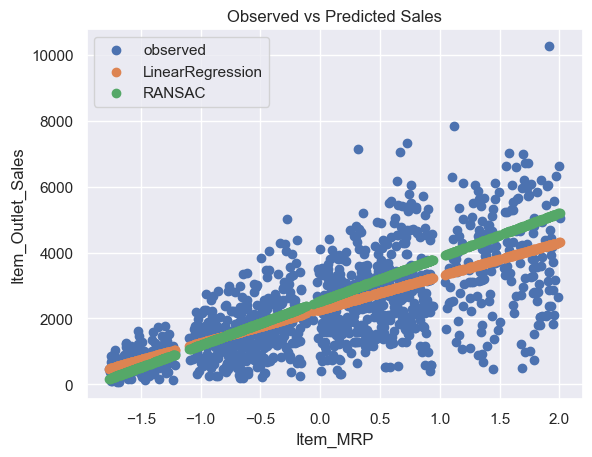

In [309]:
plt.scatter(x_test,real, label="observed")
plt.scatter(x_test,test_scaled[f'LinearRegression'], label="LinearRegression")
plt.scatter(x_test,test_scaled[f'RANSAC'], label="RANSAC")

plt.xlabel(features[0]) 
plt.ylabel(target) 
plt.title("Observed vs Predicted Sales")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


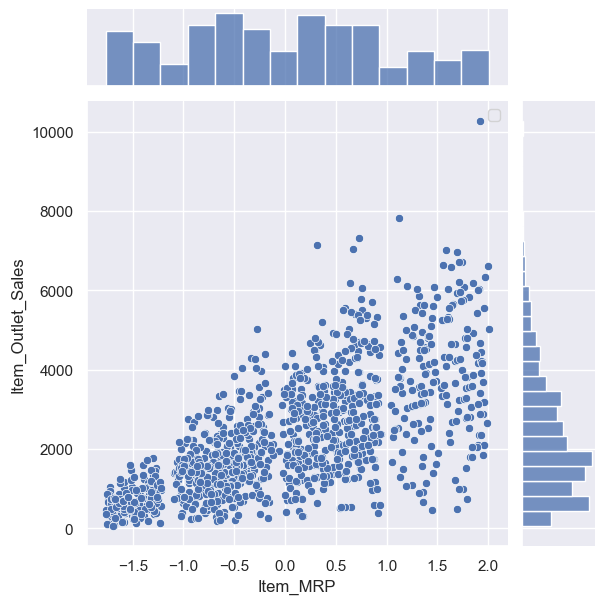

In [310]:
sns.jointplot(x=x_test,y=real)
plt.xlabel(features[0]) 
plt.ylabel(target) 
plt.legend()
plt.show()

In [343]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

X = sm.add_constant(train_scaled[numerical_features])
ols = sm.OLS(train_scaled[target], X)
lr = ols.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     425.6
Date:                Sat, 08 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:53:05   Log-Likelihood:                -29371.
No. Observations:                3487   AIC:                         5.876e+04
Df Residuals:                    3479   BIC:                         5.881e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             2275.6213     18.677    121.841      0.000    2239.003    2312.240
Item_Weight                         -8.4476     18.704     -0.452      0.652     -45.120      28.225
Item_Visibility                      1.0164     18.680      0.054      0.957     -35.608      37.640
Item_MRP                          1016.6310     18.711     54.335      0.000     979.946    1053.316
Outlet_Establishment_Year          -89.0538     25.034     -3.557      0.000    -138.137     -39.970
Outlet_Size_transformed            -49.5051     31.371     -1.578      0.115    -111.013      12.003
Item_Fat_Content_transformed         2.0702     18.799      0.110      0.912     -34.789      38.929
Outlet_Location_Type_transformed   -44.3967     26.433     -1.680      0.093     -96.223       7.430
==============================================================================
Omnibus:                      228.380   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              476.240
Skew:                           0.439   Prob(JB):                    3.85e-104
Kurtosis:                       4.584   Cond. No.                         3.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [326]:
# We can see it on the summary before

We've learned that there are some caveats in the train/test split method. In order to avoid this, we can perform something called cross validation. Try K-Fold Cross Validation (ex. 5-fold)

In [327]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
regression = svm.SVR(kernel='linear', C=1)
scores = cross_val_score(regression, df[features], df[target], cv=5)
scores

array([0.45726162, 0.4409227 , 0.45781154, 0.47649298, 0.45592834])

Plot coefficient graph

In [369]:
cols = lr.summary().tables[1].data[0]
cols[0] = 'feature'
coefs = pd.DataFrame(lr.summary().tables[1].data[1:], columns=cols)
coefs = coefs.sort_values(by=['coef'])


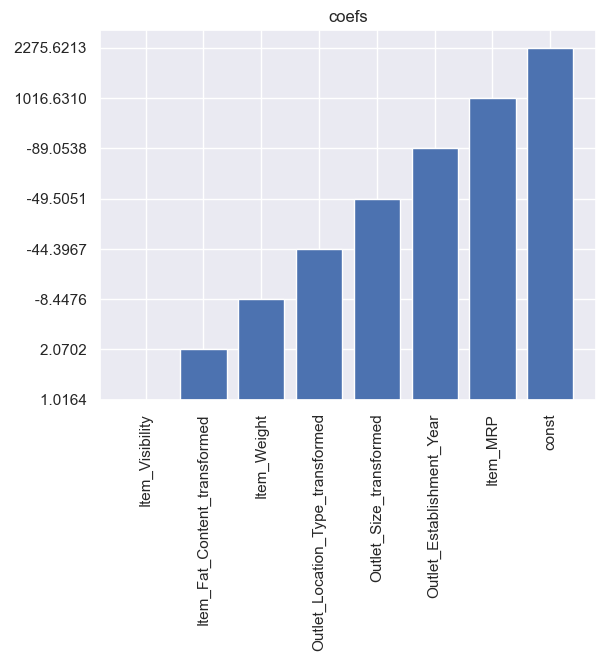

In [370]:
plt.bar(coefs['feature'], coefs['coef'])
plt.title("coefs")
plt.xticks(rotation=90)
plt.show()

#### Regularized Linear Regression

If you look at the coefficients, they are very large in magnitude which signifies overfitting. To cater to this, lets use a ridge regression model.

In [373]:
df[numerical_features].values.reshape(-1,1)

array([[9.3000000e+00],
       [1.6047301e-02],
       [2.4980920e+02],
       ...,
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00]])

In [415]:
# Todo
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
ridge_mod = make_pipeline(StandardScaler(with_mean=False), Ridge(alpha=0.5))
ridge_mod.fit(df[numerical_features], df[target])
ridge_mod_pred = ridge_mod.predict(df[numerical_features])

for feature, coef  in zip(numerical_features,ridge_mod.steps[1][1].coef_):
    print(feature,": ",coef)


Item_Weight :  -17.536726597474214
Item_Visibility :  -7.081024250248408
Item_MRP :  1018.3182967509215
Outlet_Establishment_Year :  -94.44741762127067
Outlet_Size_transformed :  -53.82172238902096
Item_Fat_Content_transformed :  5.899849819412351
Outlet_Location_Type_transformed :  -44.607368979747555


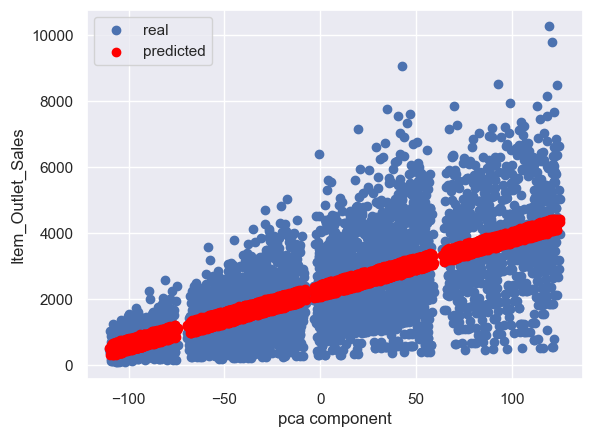

In [416]:
plt.scatter(pca_values, df[target], label='real')
plt.scatter(pca_values, ridge_mod_pred, color="red", label='predicted')
plt.xlabel("pca component")
plt.ylabel(target)
plt.legend()
plt.show()

There are so many predictors in the regression model. Can you use a lasso model to apply feature selection?

In [419]:
# Todo
lasso_mod = make_pipeline(StandardScaler(with_mean=False), Lasso(alpha=0.4))
lasso_mod.fit(df[numerical_features], df[target])
lasso_mod_pred = lasso_mod.predict(df[numerical_features])

for feature, coef  in zip(numerical_features,lasso_mod.steps[1][1].coef_):
    print(feature,": ",coef)

lasso_model = lasso_mod.steps[1][1]

Item_Weight :  -17.139182397512783
Item_Visibility :  -6.657556207047601
Item_MRP :  1018.0246069552347
Outlet_Establishment_Year :  -93.62549391630795
Outlet_Size_transformed :  -52.94049331634129
Item_Fat_Content_transformed :  5.48937215291963
Outlet_Location_Type_transformed :  -44.74036228108801


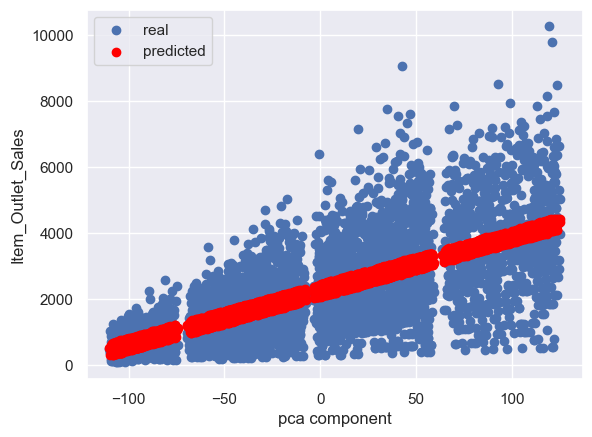

In [418]:
plt.scatter(pca_values, df[target], label='real')
plt.scatter(pca_values, lasso_mod_pred, color="red", label='predicted')
plt.xlabel("pca component")
plt.ylabel(target)
plt.legend()
plt.show()

In [423]:
lasso_model.score(df[numerical_features], df[target])

/Users/thernandezcolon/.pyenv/versions/3.9.10/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


-1920.2837549888723

What are some differences between ridge and lasso, when should we proceed to use each?

In [425]:
# Todo
#Ridge cant zero out coefficents, you either end up including all the coeficients in the model or non of them
#Lasso does both parameter shrinkage and variable selection automatically

#Lasso tends to do well if there are a small number of significant parameters and the others are close to zero (ergo: when only a few predictors actually influence the response). 
#Ridge works well if there are many large parameters of about the same value (ergo: when most predictors impact the response).

## Submission

Commit your completed **Week10_regression.ipynb** notebook to your personal Github repo you shared with the faculty.